<h3>Leitura de Imagem</h3>

In [28]:
%matplotlib inline

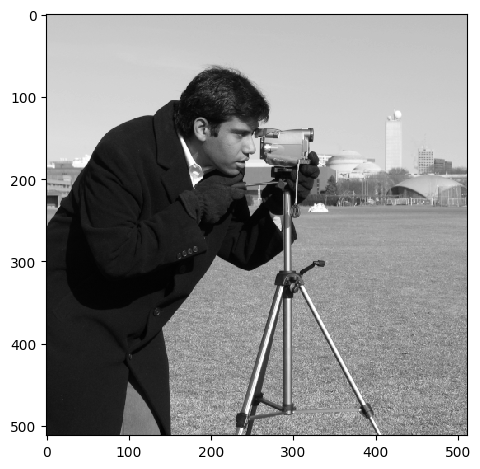

In [29]:
from skimage import data
import skimage.io as io
camera = data.camera()
io.imshow(camera)

<h3>Filtro passa-baixa - Exemplo de medida de qualidade</h3>

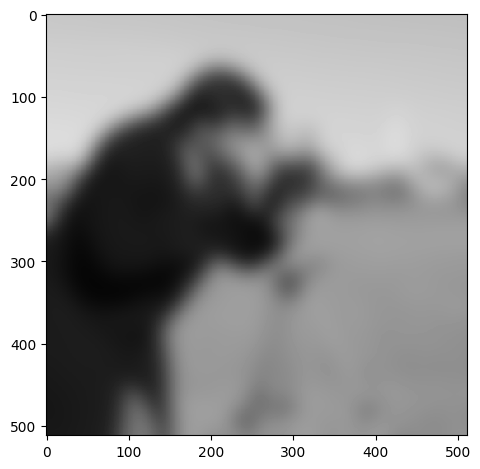

In [30]:
# application of Gaussian filter to the image
import skimage.filters as filter
res_image = filter.gaussian(camera, [13,13])
io.imshow(res_image);

In [31]:
# RMSE obtained with the Gaussian filter
from skimage import util
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
res_image = util.img_as_ubyte(res_image)
mse = mean_squared_error(res_image,camera)
print('rmse: %f'% sqrt(mse))

rmse: 25.815930


<h3> Filtro Passa-alta</h3>

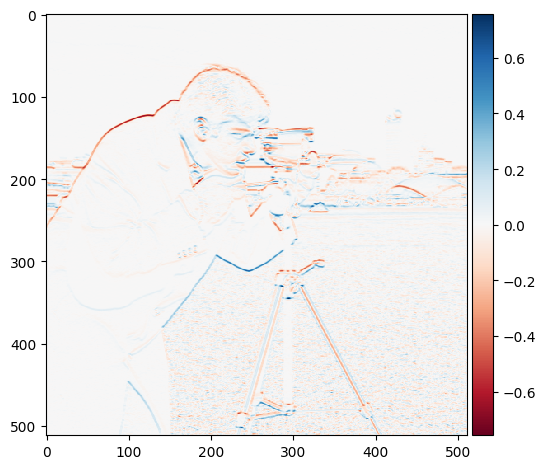

In [32]:
# application of prewitt filter to the image to detect horizontal edges
import skimage.filters as filter
res_image = filter.prewitt_h(camera)
io.imshow(res_image);

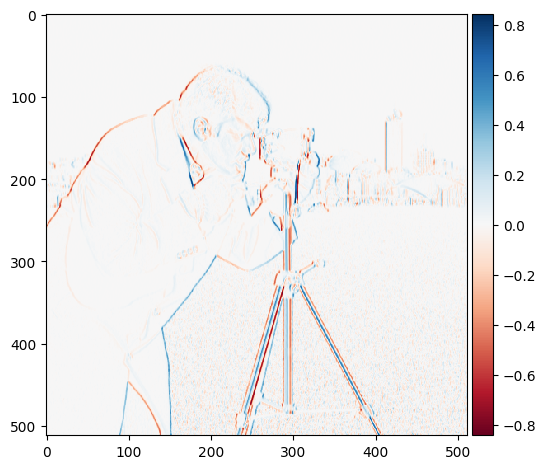

In [33]:
# application of prewitt filter to the image to detect vertical edges
import skimage.filters as filter
res_image = filter.prewitt_v(camera)
io.imshow(res_image);

<h3>Ruído Sal e Pimenta</h3>

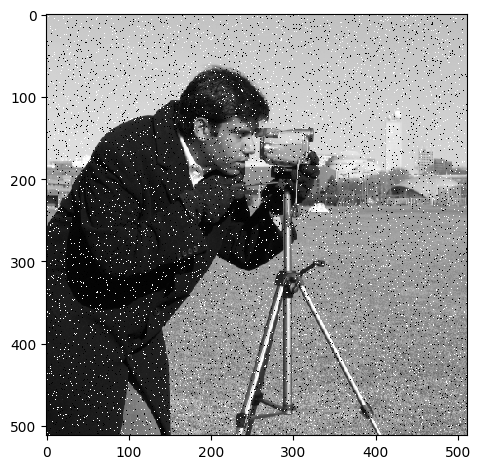

In [34]:
# add salt-and-pepper noise to the camera image
import skimage.util as util
imsp = util.random_noise(camera, mode='s&p')
imsp = util.img_as_ubyte(imsp)
io.imshow(imsp)

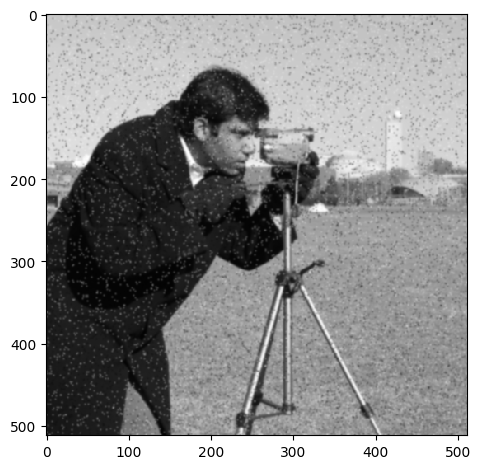

In [35]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imsp, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

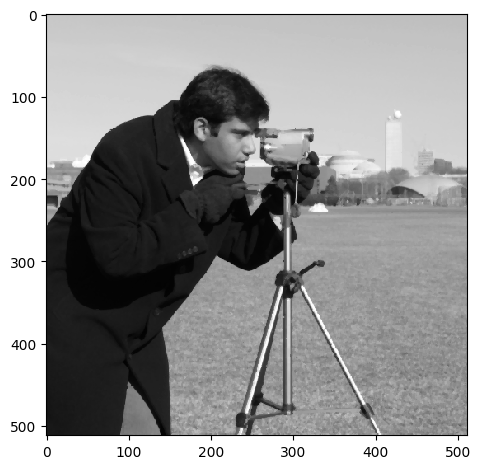

In [36]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imsp, rectangle(3,3))
io.imshow(noise_median);

In [37]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imsp,camera)
print('rmse: %f'% sqrt(mse))

rmse: 32.972129


In [38]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 7.964871


In [39]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 13.282872


<h3>Ruído Gaussiano</h3>

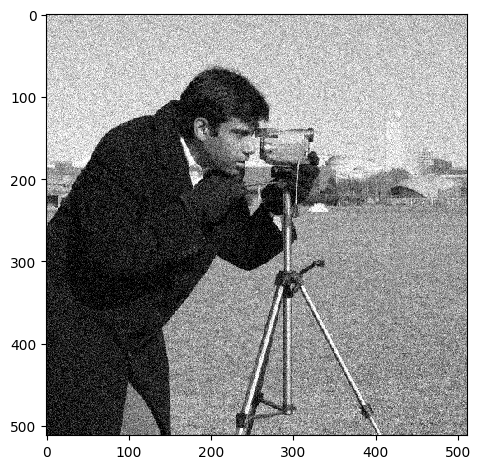

In [40]:
# add Gaussian noise to the camera image
import skimage.util as util
imGauss = util.random_noise(camera, mode='gaussian')
imGauss = util.img_as_ubyte(imGauss)
io.imshow(imGauss)

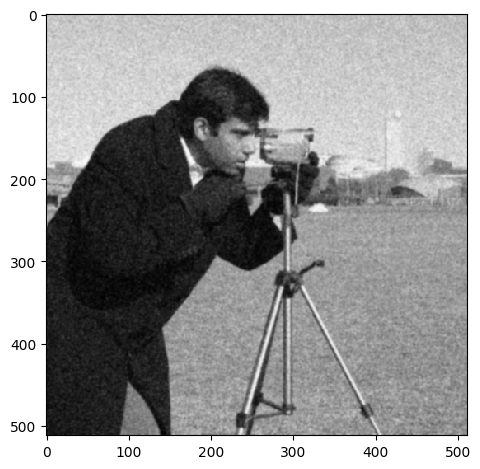

In [41]:
# apply Gaussian filter to the noisy image
import skimage.filters as filter
import skimage.util as util
noise_gaussian = filter.gaussian(imGauss, 1)
noise_gaussian = util.img_as_ubyte(noise_gaussian)
io.imshow(noise_gaussian);

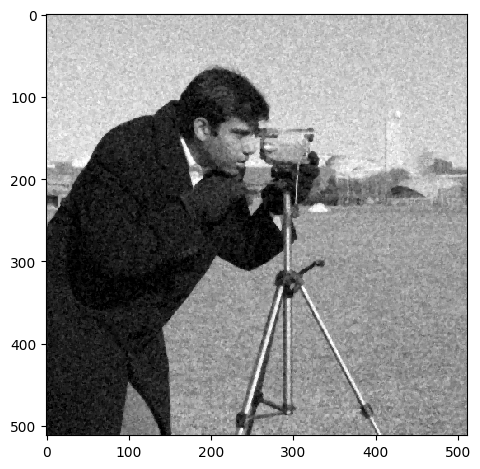

In [42]:
# apply the median filter to the noisy image
import skimage.filters as filter
from skimage.morphology import rectangle
from skimage.filters.rank import median
noise_median = median(imGauss, rectangle(3,3))
io.imshow(noise_median);

In [43]:
# RMSE between corrupted and original image
from math import sqrt
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(imGauss,camera)
print('rmse: %f'% sqrt(mse))

rmse: 24.264832


In [44]:
# RMSE betwee restaured with median and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_median,camera)
print('rmse: %f'% sqrt(mse))

rmse: 13.187208


In [45]:
# RMSE betwee restaured with Gaussian and original image
import skimage.measure as measure
from skimage.metrics import mean_squared_error 
mse = mean_squared_error(noise_gaussian,camera)
print('rmse: %f'% sqrt(mse))

rmse: 11.170873


<h3>Entropia Local </h3>

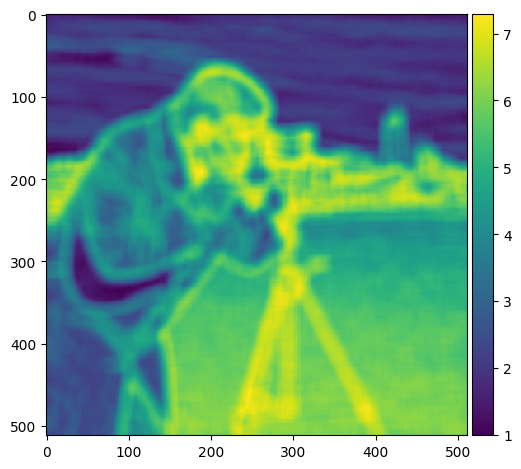

In [46]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import rectangle
img = data.camera()
ent = entropy(img, rectangle(20,20))
io.imshow(ent);

<h3>Teste da OpenCV</h3>

In [47]:
import cv2
cv2.__version__

'4.8.0'